## HOMEWORK 2: WINE

### SPECIFICATIONS
* The first part of this homework will use the wine.csv data.  Your submission must be a two-page (at most) memo in Word format with supporting analysis attached (i.e., the highlights of your Jupyter Notebook). The memo must contain the following sections:
  * Data Visualization.  Run some plots and discuss what you have found.
  * Outliers and Missing Values. Conduct outlier analysis.  If you decide to drop (or not drop) data, defend why.
  * Feature Engineering. Create at least two new features from the existing data columns.  Describe why you think they might be useful.
  * Descriptive Statistics. Run the standard descriptives, and discuss what you have found.

* Data Reshaping. The second part allows you to practice your data reshaping skills.  That part uses the survey.csv file. As listed, the data are in long format, which would be the structure if you had generated the data from an SQL query.  You must reshape the data so that it is in wide (spreadsheet) format.  The column headings must be the respno, along with new columns for the questions (q1, q2, q3, ... q16). Simply include the command you used at the end of your supporting materials.

* FYI, all memoes in this class must use standard 1" margins with 12 point font.  Im not generally picky about these things, but I do want to limit the amount you can write!  One of my favorite Mark Twain quotes is: "If I had more time, I would have written less." His point? It is hard to be succinct and clear.  That's what I want from you. 

In [1]:
#Setup the imports

import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
winesDFOrign = pd.read_csv('wine.csv')
print(winesDFOrign.shape)

#winesDF = pd.read_csv('wine.csv')

(129971, 14)


## Eliminate the duplicates from winesDFOrigin


## Checking duplicates looking at all columns but code

In [3]:
print("Number of duplicates ",winesDFOrign[winesDFOrign.duplicated(['country', 'description', 'designation', 'points', 'price',
       'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'])].shape)

winesDFOrign[winesDFOrign.duplicated(['country', 'description', 'designation', 'points', 'price',
       'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'])].head(5)

Number of duplicates  (9983, 14)


,code,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
2408,2408,US,"This is weighty, creamy and medium to full in ...",NaN,85,14.0,California,North Coast,North Coast,Virginie Boone,@vboone,Souverain 2010 Chardonnay (North Coast),Chardonnay,Souverain
2409,2409,Italy,There's a touch of toasted almond at the start...,Sallier de la Tour,85,13.0,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Tasca d'Almerita 2011 Sallier de la Tour Grill...,Grillo,Tasca d'Almerita
2410,2410,Chile,Lightly herbal strawberry and raspberry aromas...,Reserve,85,13.0,Maipo Valley,NaN,NaN,Michael Schachner,@wineschach,Tres Palacios 2011 Reserve Pinot Noir (Maipo V...,Pinot Noir,Tres Palacios
2412,2412,Italy,The Monica grape often shows a rustic or raw q...,Dolia,85,14.0,Sicily & Sardinia,Monica di Sardegna,NaN,NaN,NaN,Cantine di Dolianova 2010 Dolia (Monica di Sa...,Monica,Cantine di Dolianova
2413,2413,France,"Fruity and lightly herbaceous, this has fine t...",La Fleur d'AmÃ©lie,85,15.0,Bordeaux,Bordeaux Blanc,NaN,Roger Voss,@vossroger,ChÃ¢teau de Sours 2011 La Fleur d'AmÃ©lie (Bo...,Bordeaux-style White Blend,ChÃ¢teau de Sours


In [4]:
## There are 9983 rows that were considered duplicate

winesDF =winesDFOrign.drop_duplicates(['country', 'description', 'designation', 'points', 'price',
       'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'], keep = 'first').copy()

winesDF.shape

(119988, 14)

In [5]:


# Verify to make sure the correct records are not dropped. Should return 2 records

winesDF.loc[ (winesDF['taster_twitter_handle']=='@vboone') & (winesDF['winery']=='Souverain') & 
            (winesDF['variety']=='Chardonnay')]

,code,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
56,56,US,"This is weighty, creamy and medium to full in ...",NaN,85,14.0,California,North Coast,North Coast,Virginie Boone,@vboone,Souverain 2010 Chardonnay (North Coast),Chardonnay,Souverain
127837,127837,US,"Nuanced in amped-up ripe pineapple, stone frui...",Winemaker's Reserve,87,35.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Souverain 2011 Winemaker's Reserve Chardonnay ...,Chardonnay,Souverain


## Look at few rows from the dataframe

In [6]:
winesDF.head()

,code,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",VulkÃ Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin Oâ€™Keefe,@kerinokeefe,Nicosia 2013 VulkÃ Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Look at the shape and the datatypes of the columns

In [7]:
winesDF.shape

(119988, 14)

In [8]:
winesDF.dtypes

code                       int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

## Few sample records

In [9]:
winesDF.loc[0,:]

code                                                                     0
country                                                              Italy
description              Aromas include tropical fruit, broom, brimston...
designation                                                  VulkÃ  Bianco
points                                                                  87
price                                                                  NaN
province                                                 Sicily & Sardinia
region_1                                                              Etna
region_2                                                               NaN
taster_name                                                Kerin Oâ€™Keefe
taster_twitter_handle                                         @kerinokeefe
title                                   Nicosia 2013 VulkÃ  Bianco  (Etna)
variety                                                        White Blend
winery                   

In [10]:
winesDF.loc[3,'title']

'St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore)'

In [11]:
winesDF.loc[3,:]

code                                                                     3
country                                                                 US
description              Pineapple rind, lemon pith and orange blossom ...
designation                                           Reserve Late Harvest
points                                                                  87
price                                                                   13
province                                                          Michigan
region_1                                               Lake Michigan Shore
region_2                                                               NaN
taster_name                                             Alexander Peartree
taster_twitter_handle                                                  NaN
title                    St. Julian 2013 Reserve Late Harvest Riesling ...
variety                                                           Riesling
winery                   

## Check null values

In [12]:
winesDF.isnull().sum()

code                         0
country                     59
description                  0
designation              34545
points                       0
price                     8395
province                    59
region_1                 19560
region_2                 73219
taster_name              24917
taster_twitter_handle    29446
title                        0
variety                      1
winery                       0
dtype: int64

## Pandas display options

In [13]:
pd.options.display.max_colwidth = 250

## Check the records with missing country

In [14]:
winesDF.loc[winesDF['country'].isnull() == True]

,code,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
913,913,NaN,"Amber in color, this wine has aromas of peach jam and orange blossom. Flavors are a mÃ©lange of mellow fruit and savory notes, in particular apricot, lemon curd, quince and bitter almond. Despite strong tannins, there are moments of brightness ac...",Asureti Valley,87,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2014 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines
3131,3131,NaN,"Soft, fruity and juicy, this is a pleasant, simple wine that is a blend from different European countries. It is balanced and very drinkable for parties or barbecues. Screwcap.",Partager,83,NaN,NaN,NaN,NaN,Roger Voss,@vossroger,Barton & Guestier NV Partager Red,Red Blend,Barton & Guestier
4243,4243,NaN,"Violet-red in color, this semisweet wine has a nose of blackberry and vanilla. It is soft on entry, with flavors of black cherry, blueberry and creme brÃ»lÃ©e. It is smooth on the palate, while the blueberry pie finish is brightened up by a brief...",Red Naturally Semi-Sweet,88,18.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Kakhetia Traditional Winemaking 2012 Red Naturally Semi-Sweet Ojaleshi,Ojaleshi,Kakhetia Traditional Winemaking
9509,9509,NaN,"This mouthwatering blend starts with a nose of fresh mint, pineapple and mango, followed by flavors of orange peel, peach and lemon. Fresh and fruity with a mineral backbone, the wine finishes on an earthy spin. Pair with grilled sardines or poul...",Theopetra Malagouzia-Assyrtiko,92,28.0,NaN,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Tsililis 2015 Theopetra Malagouzia-Assyrtiko White,White Blend,Tsililis
9750,9750,NaN,"This orange-style wine has a cloudy yellow-gold appearance because it spent 30 days on the skins and 100 days on the lees. It has aromas and flavors of aged apple cider and tart apple pie with an astringent finish. This style is not for everyone,...",Orange Nikolaevo Vineyard,89,28.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Ross-idi 2015 Orange Nikolaevo Vineyard Chardonnay,Chardonnay,Ross-idi
11150,11150,NaN,"A blend of 85% Melnik, 10% Grenache Noir and 5% Petit Verdot, this wine has aromas of saddle leather, cassis and dark chocolate. In the mouth there are flavors of cherry, chocolate and dried blueberry. It has good balance with a soft tannic finish.",NaN,89,20.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Orbelus 2013 Melnik,Melnik,Orbelus
11348,11348,NaN,"Light and fruity, this is a wine that has some sweetness, a gentle series of white fruits, acidity and lemon zest at the end. Screwcap.",Partager,82,NaN,NaN,NaN,NaN,Roger Voss,@vossroger,Barton & Guestier NV Partager White,White Blend,Barton & Guestier
14030,14030,NaN,"This Furmint, grown in marl soils, has aromas of brioche, apple tart and caramelized pear and flavors of lemon-lime juice, green apple and lime blossom before a crisp clean finish.",MÃ¡rga,88,25.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,St. Donat 2013 MÃ¡rga White,White Blend,St. Donat
16000,16000,NaN,"Jumpy, jammy aromas of foxy black fruits are slightly volatile. This has a narrow mouthfeel that's high in acidity. Blackened berry flavors are spicy and peppery, while this Tannat is toasty on a live-wire acidic finish.",Valle de los Manantiales Vineyard,86,40.0,NaN,NaN,NaN,Michael Schachner,@wineschach,Familia Deicas 2015 Valle de los Manantiales Vineyard Tannat,Tannat,Familia Deicas
16749,16749,NaN,"Winemaker: Bartho Eksteen. This wooded Sauvy shows incredible restraint, harmony and balance. It opens with attractive notes of ripe gooseberry, apple flesh and green melon rind. The palate offers more just-ripe tropical-fruit tones, with a pleas...",Cape Winemakers Guild Vloekskoot Wooded,91,NaN,NaN,NaN,NaN,Lauren Buzzeo,@laurbuzz,Bartho Eksteen 2016 Cape Winemakers Guild Vloekskoot Wooded Sauvignon Blanc,Sauvignon Blanc,Bartho Eksteen


In [15]:
winesDF['hasYear'] = winesDF['title'].str.contains('\d\d\d\d', regex = True) 

In [16]:
winesDF.loc[winesDF['hasYear'] == False,]

,code,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,hasYear
63,63,France,"This fat, yeasty Champagne is comprised predominantly of Pinot Noir. It has ripe red berry fruit, light acidity and a soft, creamy aftertaste. It's ready to drink.",Brut RosÃ©,86,58.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Roland Champion NV Brut RosÃ© (Champagne),Champagne Blend,Roland Champion,False
69,69,France,"This cooperative, based in AÃ¿, has benefited from the fine Pinot Noir in the village to produce a ripe red fruited wine. With balanced acidity and a soft aftertaste, it is ready to drink.",Brut RosÃ©,86,55.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Collet NV Brut RosÃ© (Champagne),Champagne Blend,Collet,False
237,237,Italy,"The wine boasts a beautiful appearance thanks to its saturated golden color and faint amber highlights. It has a very fragrant nose and offers honey, peach and soapy floral notes. In the mouth, the wine delivers sweet fruit and a soft, silky text...",NaN,85,18.0,Central Italy,San Marino,NaN,NaN,NaN,Consorzio Vini Tipici di San Marino NV Moscato (San Marino),Moscato,Consorzio Vini Tipici di San Marino,False
315,315,Italy,"Honey, almond blossom and citrus zest are followed by creamy foam and tonic acidity. This is an easygoing Prosecco that offers a light and compact structure and bright flavors of lime and green fruit.",Extra Dry,86,15.0,Veneto,Prosecco di Valdobbiadene,NaN,NaN,NaN,Bellussi NV Extra Dry (Prosecco di Valdobbiadene),Prosecco,Bellussi,False
326,326,Italy,Drying mineral tones face off with luscious peach flavors to create a well-balanced Extra Dry Prosecco sparkler. The bubbly offers cheerful foaming in the mouth and sweet fruit flavors on the close.,Extra Dry,86,15.0,Veneto,Prosecco di Valdobbiadene,NaN,NaN,NaN,Marsuret NV Extra Dry (Prosecco di Valdobbiadene),Prosecco,Marsuret,False
332,332,Italy,"This Prosecco Brut from the slightly warmer Conegliano subzone is a perfect example of its kind. The luminous sparkler offers drying mineral tones that are embellished by pretty notes of white rose, honey, stone fruit and citrus. The mouthfeel is...",Palazzo Rosso Brut,86,19.0,Veneto,Prosecco di Conegliano,NaN,NaN,NaN,Sommariva NV Palazzo Rosso Brut (Prosecco di Conegliano),Prosecco,Sommariva,False
333,333,Italy,This crisp sparkler is characterized by drying mineral tones and delicate aromas of stone fruit and citrus. The wine is foamy and slightly sweet in the mouth and does an excellent job of representing this category of Italian wine.,Col del Sas Extra Dry,86,18.0,Veneto,Prosecco di Valdobbiadene,NaN,NaN,NaN,Spagnol NV Col del Sas Extra Dry (Prosecco di Valdobbiadene),Prosecco,Spagnol,False
334,334,France,"A ripe, fruity wine that takes its raspberry flavor from the color. The wine has softness, a creamy character that rounds out any acidity, leaving a smooth, fruity finish.",MosaÃ¯que RosÃ© Brut,86,42.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Jacquart NV MosaÃ¯que RosÃ© Brut (Champagne),Champagne Blend,Jacquart,False
342,342,Spain,"Funky, yeasty aromas of cinnamon, spent lees and bread yeast dominate the nose. This feels foamy, with lightly vegetal flavors of apple that finish briny.",NaN,82,11.0,Catalonia,Cava,NaN,Michael Schachner,@wineschach,Bellisco NV Sparkling (Cava),Sparkling Blend,Bellisco,False
345,345,Australia,"This wine contains some material over 100 years old, but shows no signs of fragility. Instead, it's concentrated through age and should hold in the bottle indefinitely. It's dark coffee-brown in color, with delectable aromas of rancio, dried fig,...",Rare,100,350.0,Victoria,Rutherglen,NaN,Joe Czerwinski,@JoeCz,Chambers Rosewood Vineyards NV Rare Muscat (Rutherglen),Muscat,Chambers Rosewood Vineyards,False


# Frequency table of variety

In [17]:
winesDF['variety'].value_counts().head()

Pinot Noir                  12278
Chardonnay                  10868
Cabernet Sauvignon           8840
Red Blend                    8243
Bordeaux-style Red Blend     6471
Name: variety, dtype: int64

## Descriptive statistics on price

In [18]:
winesDF['price'].describe()

count    111593.000000
mean         35.620747
std          42.103728
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [19]:
winesDF.loc[(winesDF['price']>125)].shape


(1968, 15)

## Descriptive statistics on points

In [20]:
winesDF['points'].describe()

count    119988.000000
mean         88.442236
std           3.092915
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

## Calculate vintage_year

In [21]:
winesDF['vintage_year_str']=winesDF.loc[winesDF['hasYear'] == True,'title'].str.extract('(\d\d\d\d)', expand = True)
winesDF['vintage_year'] = 0
winesDF['vintage_year'] = winesDF.loc[winesDF['hasYear'] == True,'vintage_year_str'].astype(int)

del winesDF['vintage_year_str']


## Calculate rating category


In [22]:
#95-100 Classic: a great wine
#90-94 Outstanding: a wine of superior character and style
#85-89 Very good: a wine with special qualities
#80-84 Good: a solid, well-made wine
#75-79 Mediocre: a drinkable wine that may have minor flaws
#50-74 Not recommended

winesDF.loc[(winesDF['points'] >=95), 'rating_category'] = 'Classic'
winesDF.loc[(winesDF['points'] >=90) & (winesDF['points'] <=94), 'rating_category'] = 'Outstanding'
winesDF.loc[(winesDF['points'] >=85) & (winesDF['points'] <=89), 'rating_category'] = 'Very good'
winesDF.loc[(winesDF['points'] >=80) & (winesDF['points'] <=84), 'rating_category'] = 'Good'
winesDF.loc[(winesDF['points'] >=75) & (winesDF['points'] <=79), 'rating_category'] = 'Mediocre'
winesDF.loc[(winesDF['points'] >=50) & (winesDF['points'] <=74), 'rating_category'] = 'Not recommended'


In [23]:
winesDF['rating_category'].value_counts()

Very good      62310
Outstanding    43198
Good           12088
Classic         2392
Name: rating_category, dtype: int64

In [24]:
62310 + 43198 +12088+2392

119988

In [25]:
winesDF.dtypes

code                       int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
hasYear                     bool
vintage_year             float64
rating_category           object
dtype: object

## Calculate is_vintage flag and verify all nonvintage wines have NV in the title

In [26]:
winesDF['hasNV'] = winesDF.loc[(winesDF['hasYear'] ==False) , 'title'].str.extract(' (NV) ', expand = True)

print("The following should result in 0 rows")
print(len(winesDF.loc[(winesDF['hasYear'] ==False) & ( winesDF['hasNV'] !='NV' ) ,: ]))

print(winesDF['hasYear'].value_counts())
print(winesDF['hasNV'].value_counts())

winesDF['is_vintage'] = winesDF['hasYear']

The following should result in 0 rows
0
True     115719
False      4269
Name: hasYear, dtype: int64
NV    4269
Name: hasNV, dtype: int64


In [27]:
winesDF.dtypes

code                       int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
hasYear                     bool
vintage_year             float64
rating_category           object
hasNV                     object
is_vintage                  bool
dtype: object

## Missing value analysis

In [28]:
winesDF.isnull().sum()

code                          0
country                      59
description                   0
designation               34545
points                        0
price                      8395
province                     59
region_1                  19560
region_2                  73219
taster_name               24917
taster_twitter_handle     29446
title                         0
variety                       1
winery                        0
hasYear                       0
vintage_year               4269
rating_category               0
hasNV                    115719
is_vintage                    0
dtype: int64

# Null Values Analysis
* Country, Province missing in a very small percentage of rows (0.04%). No action needed here
* Designation - Missing in more than 20% of the rows but after analysis couldn't be figured out from title
* Price is missing about 7% of the rows. 
* Region1 and Region2 are missing in a lot of rows and can't be used for detailed analysis on these columns
* taster_name and twitter handle have a lot of null values

In [29]:
winesDF[winesDF.designation.isnull()]

,code,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,hasYear,vintage_year,rating_category,hasNV,is_vintage
2,2,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,True,2013.0,Very good,NaN,True
7,7,France,"This dry and restrained wine offers spice in profusion. Balanced with acidity and a firm texture, it's very much for food.",NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),GewÃ¼rztraminer,Trimbach,True,2012.0,Very good,NaN,True
11,11,France,"This is a dry wine, very spicy, with a tight, taut texture and strongly mineral character layered with citrus as well as pepper. It's a food wine with its almost crisp aftertaste.",NaN,87,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Leon Beyer 2012 Gewurztraminer (Alsace),GewÃ¼rztraminer,Leon Beyer,True,2012.0,Very good,NaN,True
12,12,US,"Slightly reduced, this wine offers a chalky, tannic backbone to an otherwise juicy explosion of rich black cherry, the whole accented throughout by firm oak and cigar box.",NaN,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,@vboone,Louis M. Martini 2012 Cabernet Sauvignon (Alexander Valley),Cabernet Sauvignon,Louis M. Martini,True,2012.0,Very good,NaN,True
14,14,US,"Building on 150 years and six generations of winemaking tradition, the winery trends toward a leaner style, with the classic California buttercream aroma cut by tart green apple. In this good everyday sipping wine, flavors that range from pear to...",NaN,87,12.0,California,Central Coast,Central Coast,Matt Kettmann,@mattkettmann,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,Mirassou,True,2012.0,Very good,NaN,True
19,19,US,"Red fruit aromas pervade on the nose, with cigar box and menthol notes riding in the back. The palate is slightly restrained on entry, but opens up to riper notes of cherry and plum specked with crushed pepper. This blend of Merlot, Cabernet Sauv...",NaN,87,32.0,Virginia,Virginia,NaN,Alexander Peartree,NaN,QuiÃ©vremont 2012 Meritage (Virginia),Meritage,QuiÃ©vremont,True,2012.0,Very good,NaN,True
21,21,US,"A sleek mix of tart berry, stem and herb, along with a hint of oak and chocolate, this is a fair value in a widely available, drink-now Oregon Pinot. The wine oak-aged for six months, whether in neutral or re-staved is not indicated.",NaN,87,20.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwineÂ,Acrobat 2013 Pinot Noir (Oregon),Pinot Noir,Acrobat,True,2013.0,Very good,NaN,True
27,27,Italy,"Aromas recall ripe dark berry, toast and a whiff of cake spice. The soft, informal palate offers sour cherry, vanilla and a hint of espresso alongside round tannins. Drink soon.",NaN,87,10.0,Sicily & Sardinia,Terre Siciliane,NaN,Kerin Oâ€™Keefe,@kerinokeefe,Stemmari 2013 Nero d'Avola (Terre Siciliane),Nero d'Avola,Stemmari,True,2013.0,Very good,NaN,True
29,29,US,"Clarksburg is becoming a haven for Chenin Blanc in California. This bottling, using fruit sourced from several vineyards in the area, is balanced with just a trace of sweetness in the background (1% residual sugar). This is crisp, straightforward...",NaN,86,16.0,California,Clarksburg,Central Valley,Virginie Boone,@vboone,Clarksburg Wine Company 2010 Chenin Blanc (Clarksburg),Chenin Blanc,Clarksburg Wine Company,True,2010.0,Very good,NaN,True
34,34,US,"This shows a tart, green gooseberry flavor that is similar to New Zealand Sauvignon Blanc. Other notes include tropical fruit, orange and honey. Unoaked, with a splash of Muscat, this has commendable dryness and acidity.",NaN,86,20.0,California,Sonoma Valley,Sonoma,NaN,NaN,Envolve 2011 Sauvignon Blanc (Sonoma Valley),Sauvignon Blanc,Envolve,True,2011.0,Very good

## Create deep copies of vintage and nonvintage wines

In [30]:
vintageDF = winesDF[ winesDF.is_vintage == True].copy()
nonvintageDF = winesDF[ winesDF.is_vintage == False].copy()

In [31]:
nonvintageDF.shape

(4269, 19)

## Create piechart to show number of tastings by vintage and nonvintage

In [32]:
s = winesDF.groupby(by='is_vintage').size()
wineTypesDF = pd.DataFrame( {"ntastings":s})
wineTypesDF.loc[ True, 'wine_type']  = 'Vintage'
wineTypesDF.loc[ False, 'wine_type']  = 'Non-vintage'

wineTypesDF

,ntastings,wine_type
is_vintage,,
False,4269,Non-vintage
True,115719,Vintage


In [33]:
wineTypesDF.dtypes

ntastings     int64
wine_type    object
dtype: object

/Users/suman/Applications/miniconda3/envs/ml35/lib/python3.5/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


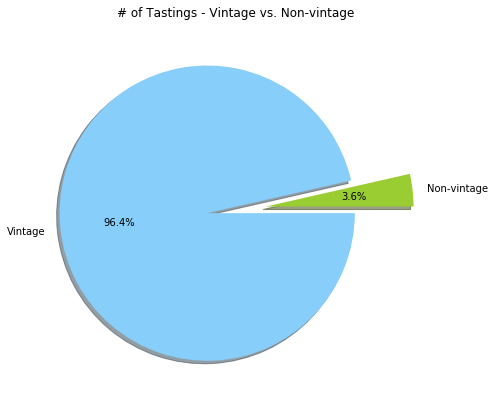

In [34]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots(figsize=(7,7))
colors = ['yellowgreen', 'lightskyblue']
ax1.pie(wineTypesDF['ntastings'] , explode=[0.2,0.2], labels = wineTypesDF['wine_type'], shadow=True, startangle=0, autopct='%1.1f%%', colors = colors)
ax1.axis('equal')
ax1.set_title("# of Tastings - Vintage vs. Non-vintage")
fig1.show()

## Initialize geopandas and load shape files

In [35]:
import geopandas as gpd
shapefile = 'data/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']


print(gdf[gdf['country'] == 'Antarctica'])

#Drop row corresponding to 'Antarctica'
gdf = gdf.drop(gdf.index[159])

gdf.loc[gdf['country'].str.contains('Cz')]

        country country_code  \
159  Antarctica          ATA   

                                                                                                                                                                                                                                                      geometry  
159  (POLYGON ((-48.66061601418252 -78.04701873159873, -48.1513964503784 -78.04706960058677, -46.66285681821098 -77.83147552506506, -45.15475765642109 -78.04706960058677, -43.92082780615574 -78.47810272233328, -43.48994971370611 -79.0855599913685, -43...  


,country,country_code,geometry
153,Czechia,CZE,"POLYGON ((15.01699588385867 51.10667409932158, 15.49097212083973 50.78472992614321, 16.23862674323857 50.69773265237984, 16.17625328946227 50.42260732685791, 16.71947594571444 50.21574656839354, 16.86876915860566 50.47397370055603, 17.55456709155..."


In [36]:
vintageTastingsByCountrySeries = vintageDF.groupby(by= 'country').size().sort_values(ascending = False)
vintageTastingsByCountryDF = pd.DataFrame( {"country":vintageTastingsByCountrySeries.index, "ntastings" : vintageTastingsByCountrySeries})

vintageTastingsByCountryDF.loc['US','country'] = 'United States of America'
vintageTastingsByCountryDF.loc['England','country'] = 'United Kingdom'
vintageTastingsByCountryDF.loc['Serbia','country'] = 'Republic of Serbia'
vintageTastingsByCountryDF.loc['Czech Republic','country'] = 'Czechia'
print(vintageTastingsByCountryDF.sort_values(by='ntastings', ascending=False))

vintageTastingsByCountryDF['matchfound'] =vintageTastingsByCountryDF['country'].isin(gdf['country'])

vintageTastingsByCountryDF.loc[vintageTastingsByCountryDF['matchfound'] ==False]

vintageTastingsByCountryDF.index.name = 'country_index'

merged = gdf.merge(vintageTastingsByCountryDF, left_on = 'country', right_on = 'country', how= 'left' )
#Replace NaN values to string 'No data'.
merged.fillna('No data', inplace = True)

merged


                                         country  ntastings
country                                                    
US                      United States of America      49585
France                                    France      18909
Italy                                      Italy      17022
Spain                                      Spain       5656
Portugal                                Portugal       4960
Chile                                      Chile       4159
Argentina                              Argentina       3502
Austria                                  Austria       2996
Australia                              Australia       2130
Germany                                  Germany       1978
South Africa                        South Africa       1286
New Zealand                          New Zealand       1270
Israel                                    Israel        465
Greece                                    Greece        411
Canada                                  

,country,country_code,geometry,ntastings,matchfound
0,Fiji,FJI,"(POLYGON ((180 -16.06713266364245, 180 -16.5552165666392, 179.3641426619641 -16.80135407694688, 178.7250593629971 -17.01204167436804, 178.5968385951171 -16.63915, 179.0966093629971 -16.4339842775474, 179.4135093629971 -16.3790542775474, 180 -16.0...",No data,No data
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371119710453 -0.9500000000000001, 34.07261999999997 -1.059819999999945, 37.69868999999994 -3.096989999999948, 37.7669 -3.67712, 39.20222 -4.67677, 38.74053999999995 -5.908949999999948, 38.79977000000008 -6.475660000000005, 39.44 -6...",No data,No data
2,Western Sahara,SAH,"POLYGON ((-8.665589565454809 27.65642588959236, -8.665124477564191 27.58947907155823, -8.684399786809053 27.39574412689601, -8.6872936670174 25.88105621998891, -11.96941891117116 25.93335276946827, -11.93722449385332 23.37459422453617, -12.874221...",No data,No data
3,Canada,CAN,"(POLYGON ((-122.84 49.00000000000011, -122.97421 49.00253777777778, -124.91024 49.98456, -125.62461 50.41656, -127.43561 50.83061, -127.99276 51.71583, -127.85032 52.32961, -129.12979 52.75538, -129.30523 53.56159, -130.51497 54.28757, -130.53610...",225,True
4,United States of America,USA,"(POLYGON ((-122.84 49.00000000000011, -120 49.00000000000011, -117.03121 49, -116.04818 49, -113 49, -110.05 49, -107.05 49, -104.04826 48.99986000000007, -100.65 49.00000000000011, -97.2287200000048 49.0007, -95.15906950917206 49, -95.1560900000...",49585,True
5,Kazakhstan,KAZ,"POLYGON ((87.35997033076265 49.21498078062912, 86.59877648310336 48.54918162698063, 85.7682328633083 48.45575063739699, 85.72048383987067 47.45296946877311, 85.16429039911324 47.0009557155161, 83.18048383986047 47.33003123635086, 82.4589258157690...",No data,No data
6,Uzbekistan,UZB,"POLYGON ((55.96819135928291 41.30864166926936, 55.9289172707411 44.99585846615911, 58.50312706892845 45.58680430763297, 58.68998904809581 45.50001373959873, 60.23997195825834 44.78403677019473, 61.05831994003245 44.40581696225051, 62.013300408786...",No data,No data
7,Papua New Guinea,PNG,"(POLYGON ((141.0002104025918 -2.60015105551566, 142.7352466167915 -3.28915292726321, 144.5839709820332 -3.861417738463416, 145.27317955951 -4.373737888205049, 145.8297864117257 -4.876497897972683, 145.981921828393 -5.465609226100043, 147.64807335...",No data,No data
8,Indonesia,IDN,"(POLYGON ((141.0002104025918 -2.60015105551566, 141.017056919519 -5.859021905138071, 141.0338517600138 -9.117892754760483, 140.1434151551925 -8.29716765710095, 139.1277665549281 -8.096042982620979, 138.881476678625 -8.380935153846075, 137.6144739...",No data,No data
9,Argentina,ARG,"(POLYGON ((-68.63401022758323 -52.63637045887449, -68.25 -53.1, -67.75 -53.85, -66.45 -54.45, -65.05 -54.7, -65.5 -55.2, -66.45 -55.25, -66.95992000000001 -54.89681000000002, -67.56244 -54.87001, -68.63335000000001 -54.8695, -68.63401022758323 -5...",3502,True


In [37]:
import json
#Read data to json.
merged_json = json.loads(merged.to_json())
#Convert to String like object.
json_data = json.dumps(merged_json)




In [38]:
from bokeh.palettes import all_palettes
from bokeh.palettes import brewer


#all_palettes['Viridis'][256]
brewer['Spectral'][4]

['#2b83ba', '#abdda4', '#fdae61', '#d7191c']

In [39]:

from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer
from bokeh.palettes import all_palettes



#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)
#Define a sequential multi-hue color palette.
#palette = brewer['YlGnBu'][9]
#palette = brewer['Inferno'][11]
palette = all_palettes['Viridis'][256]

#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 53500, nan_color = '#d9d9d9')
#Define custom tick labels for color bar.
tick_labels = {'1': '1', '100':'100', '1000':'1000', '40000':'40,000', '50000':'50,000', '60000':'60,000'}
#tick_labels = {'10000': '10,000', '20000':'20,000', '30000':'30,000', '40000':'40,000', '50000':'50,000', '60000':'60,000'}
#tick_labels = {'100': '100', '500':'500','10000': '10,000', '20000':'20,000', '30000':'30,000', '40000':'40,000', '50000':'50,000', '60000':'60,000'}
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)
#Create figure object.
p = figure(title = 'Vintage wine tastings by country', plot_height = 500 , plot_width = 750, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'ntastings', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify figure layout.
p.add_layout(color_bar, 'below')
#Display figure inline in Jupyter Notebook.
output_notebook()
#Display figure.
show(p)






Loading BokehJS ...

In [40]:
from bokeh.io import export_png

export_png(p, filename="map.png")


'/Users/suman/Courses/MISY830/Module1/JPMC Module 2 Data & Visualization/map.png'

In [41]:
vintageCountryCatSeries = vintageDF.groupby(by= ['country','rating_category']).size()

vintageCountryCatDF = pd.DataFrame( {"ntastings": vintageCountryCatSeries})
#vintageCountryCatDF['country'] = vintageCountryCatDF.index.levels[0]
#vintageCountryCatDF['rating_category'] = vintageCountryCatDF.index.levels[1]

vintageCountryCatDF.reset_index(inplace=True)
#vintageCountryCatDF.loc[vintageCountryCatDF.country=='US','country'] = 'United States of America'
#vintageCountryCatDF.loc[vintageCountryCatDF.country=='England','country'] = 'United Kingdom'
#vintageCountryCatDF.loc[vintageCountryCatDF.country=='Serbia','country'] = 'Republic of Serbia'
#vintageCountryCatDF.loc[vintageCountryCatDF.country=='Czech Republic','country'] = 'Czechia'

top10df = vintageCountryCatDF.groupby(by='country').sum().sort_values(ascending = False, by = 'ntastings').head(10)

top10df.reset_index(inplace= True)
print(top10df)

vintageCountryCatDF['toplist'] = vintageCountryCatDF['country'].isin(top10df['country'])
#Drop rows that are not in top 10
vintageCountryCatDF = vintageCountryCatDF.loc[vintageCountryCatDF['toplist']==True,:]

vintageCountryCatDF


     country  ntastings
0         US      49585
1     France      18909
2      Italy      17022
3      Spain       5656
4   Portugal       4960
5      Chile       4159
6  Argentina       3502
7    Austria       2996
8  Australia       2130
9    Germany       1978


,country,rating_category,ntastings,toplist
0,Argentina,Classic,11,True
1,Argentina,Good,959,True
2,Argentina,Outstanding,701,True
3,Argentina,Very good,1831,True
5,Australia,Classic,40,True
6,Australia,Good,204,True
7,Australia,Outstanding,823,True
8,Australia,Very good,1063,True
9,Austria,Classic,116,True
10,Austria,Good,40,True


In [42]:
vintageCountryCatWideDF = vintageCountryCatDF.pivot(index='country', columns='rating_category', values='ntastings')
vintageCountryCatWideDF

rating_category,Classic,Good,Outstanding,Very good
country,,,,
Argentina,11,959,701,1831
Australia,40,204,823,1063
Austria,116,40,1704,1136
Chile,1,988,609,2561
France,650,1418,7432,9409
Germany,65,20,1057,836
Italy,343,697,5752,10230
Portugal,102,490,1696,2672
Spain,50,1094,1340,3172


In [43]:
vintageCountryCatWideDF.columns

Index(['Classic', 'Good', 'Outstanding', 'Very good'], dtype='object', name='rating_category')

In [73]:
import os
os.getcwd()

'/Users/suman/Courses/MISY830/Module1/JPMC Module 2 Data & Visualization'

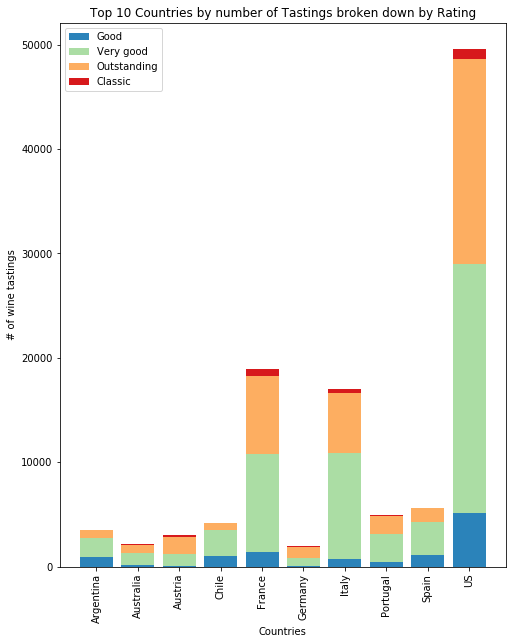

In [79]:

import matplotlib.pyplot as plt
#fig2, ax2 = plt.subplots(figsize=(7,7))
#colors = ['yellowgreen', 'lightskyblue']
#ax1.pie(wineTypesDF['ntastings'] , explode=[0.2,0.2], labels = wineTypesDF['wine_type'], shadow=True, startangle=0, autopct='%1.1f%%', colors = colors)
#ax1.axis('equal')
#colors =['#0570b0', '#74a9cf', '#bdc9e1', '#f1eef6']
colors = ['#2b83ba', '#abdda4', '#fdae61', '#d7191c']

fig = plt.figure(figsize=(8,10))

plt.bar(vintageCountryCatWideDF.index ,vintageCountryCatWideDF['Good'], color = colors[0]  )
plt.bar(vintageCountryCatWideDF.index ,vintageCountryCatWideDF['Very good'], bottom = vintageCountryCatWideDF['Good'], color = colors[1]    )
plt.bar(vintageCountryCatWideDF.index ,vintageCountryCatWideDF['Outstanding'], bottom = vintageCountryCatWideDF['Good'] + vintageCountryCatWideDF['Very good'],  color = colors[2]  )
plt.bar(vintageCountryCatWideDF.index ,vintageCountryCatWideDF['Classic'], bottom = vintageCountryCatWideDF['Good'] + vintageCountryCatWideDF['Very good']+ vintageCountryCatWideDF['Outstanding'], color = colors[3]  )
plt.xticks(rotation=90)

plt.legend(['Good','Very good','Outstanding','Classic'])
plt.title("Top 10 Countries by number of Tastings broken down by Rating")
plt.xlabel("Countries")
plt.ylabel("# of wine tastings")
plt.show()

#fig = plt.figure()

fig.savefig('Top10CountriesByRating.png', dpi = fig.dpi)


#plt.set_xticklabels(vintageCountryCatWideDF.index, rotation = 90)
#plt.set_xlabel("Countries")
#plt.set_ylabel("# of wine tastings")
#ax2.legend()



#fig2.show()



In [45]:
nonvintageDF.groupby(by= ['country','rating_category']).size()

country         rating_category
Argentina       Good                24
                Outstanding          2
                Very good           16
Australia       Classic              6
                Good                12
                Outstanding         18
                Very good           31
Austria         Classic              1
                Good                 2
                Outstanding         13
                Very good           22
Brazil          Good                 2
                Very good            9
Canada          Very good            1
Chile           Classic              1
                Good                14
                Outstanding          1
                Very good            9
Croatia         Outstanding          1
Cyprus          Very good            1
Czech Republic  Very good            1
England         Outstanding          8
                Very good            4
France          Classic              8
                Good            

## Correlation analysis

In [46]:
vintageDF[['points','price','vintage_year']].corr()

,points,price,vintage_year
points,1.000000,0.415097,0.011114
price,0.415097,1.000000,-0.003441
vintage_year,0.011114,-0.003441,1.000000


In [47]:
vintageDF.loc[vintageDF['rating_category'] == 'Classic', ['points','price','vintage_year']].corr()

,points,price,vintage_year
points,1.000000,0.292263,-0.016069
price,0.292263,1.000000,-0.017110
vintage_year,-0.016069,-0.017110,1.000000


In [48]:
vintageDF.loc[vintageDF['rating_category'] == 'Outstanding', ['points','price','vintage_year']].corr()

,points,price,vintage_year
points,1.000000,0.326119,-0.001626
price,0.326119,1.000000,-0.009917
vintage_year,-0.001626,-0.009917,1.000000


In [49]:
vintageDF.columns

Index(['code', 'country', 'description', 'designation', 'points', 'price',
       'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery', 'hasYear',
       'vintage_year', 'rating_category', 'hasNV', 'is_vintage'],
      dtype='object')

In [50]:
winesDF.loc[ (winesDF['taster_name']== 'Alexander Peartree') & (winesDF['winery']== 'Bending Branch') & (winesDF['variety']== 'Roussanne')]

,code,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,hasYear,vintage_year,rating_category,hasNV,is_vintage
41471,41471,US,"A pop of peach and candied banana emerge from the glass. There's a nice roundness to the palate that's held in check by a lively stream of acidity, with additional notes of banana and a hint of butter.",Comfortage Hoover Valley Vineyard,86,28.0,Texas,NaN,NaN,Alexander Peartree,NaN,Bending Branch 2015 Comfortage Hoover Valley Vineyard Roussanne,Roussanne,Bending Branch,True,2015.0,Very good,NaN,True


In [51]:
winesDF.columns

Index(['code', 'country', 'description', 'designation', 'points', 'price',
       'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery', 'hasYear',
       'vintage_year', 'rating_category', 'hasNV', 'is_vintage'],
      dtype='object')

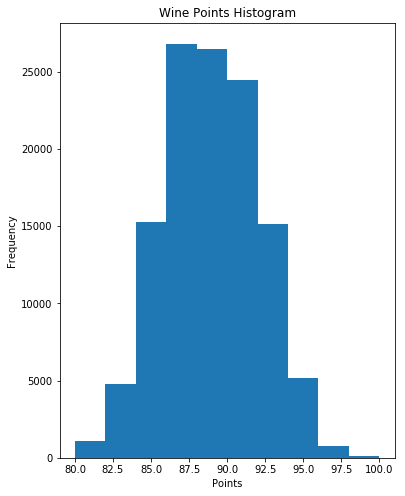

In [82]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,8))

plt.hist(winesDF['points'])
plt.xlabel("Points")
plt.ylabel("Frequency")
plt.title("Wine Points Histogram")
plt.show()

fig.savefig('winepointshist.png')

/Users/suman/Applications/miniconda3/envs/ml35/lib/python3.5/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/suman/Applications/miniconda3/envs/ml35/lib/python3.5/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


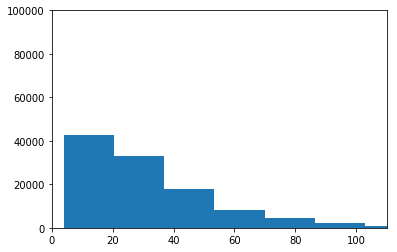

In [53]:
import matplotlib.pyplot as plt

plt.hist(winesDF['price'], bins=200)
plt.ylim(top=100000)
plt.xlim(right = 110, left = 0)
plt.show()

In [54]:
winesDF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
code,119988.0,63214.087509,37505.899183,0.0,30501.75,62405.5,95388.25,129970.0
points,119988.0,88.442236,3.092915,80.0,86.00,88.0,91.00,100.0
price,111593.0,35.620747,42.103728,4.0,17.00,25.0,42.00,3300.0
vintage_year,115719.0,2010.923772,55.947166,1000.0,2009.00,2011.0,2013.00,7200.0


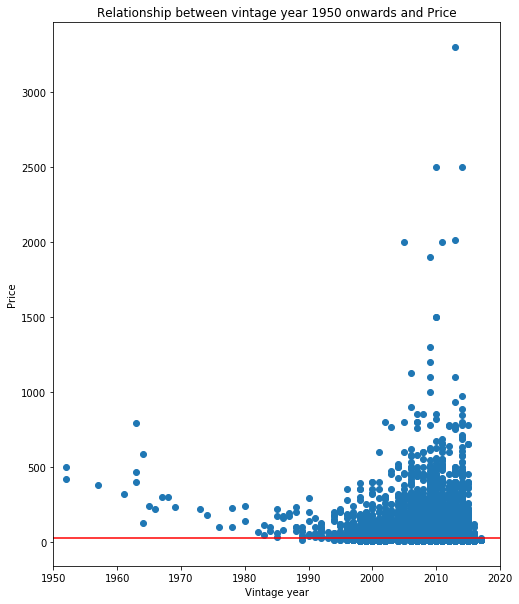

In [91]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,10))
plt.scatter(vintageDF['vintage_year'], vintageDF['price'])
plt.axhline(y=25, color='r', linestyle='-')

plt.xlim(right =2020, left = 1950)
plt.title("Relationship between vintage year 1950 onwards and Price")
plt.ylabel("Price")
plt.xlabel("Vintage year")

plt.show()

fig.savefig('VintageYearPriceScatter.png')


In [56]:
vintageDF.columns

Index(['code', 'country', 'description', 'designation', 'points', 'price',
       'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery', 'hasYear',
       'vintage_year', 'rating_category', 'hasNV', 'is_vintage'],
      dtype='object')

In [57]:
vintageDF['vintage_year'].value_counts()

2012.0    14339
2013.0    14307
2014.0    13984
2011.0    11528
2010.0    11274
2009.0     9269
2015.0     8962
2008.0     7007
2007.0     6721
2006.0     5566
2005.0     3482
2016.0     3309
2004.0     1713
2000.0      752
2001.0      684
1999.0      639
2003.0      573
1998.0      549
2002.0      357
1997.0      302
1996.0       67
1995.0       49
1852.0       41
1994.0       23
1898.0       21
1992.0       16
7200.0       13
2017.0       11
1868.0        8
1912.0        7
          ...  
1978.0        2
1952.0        2
1827.0        2
1964.0        2
1845.0        2
1607.0        1
1503.0        1
1070.0        1
1847.0        1
1789.0        1
1904.0        1
1919.0        1
1982.0        1
1976.0        1
1621.0        1
3000.0        1
1752.0        1
1973.0        1
1969.0        1
1968.0        1
1967.0        1
1965.0        1
1961.0        1
1957.0        1
1947.0        1
1945.0        1
1941.0        1
1935.0        1
1934.0        1
1974.0        1
Name: vintage_year, Leng

In [58]:
vintageDF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
code,115719.0,63250.584459,37519.848990,0.0,30516.5,62440.0,95445.5,129970.0
points,115719.0,88.482064,3.093594,80.0,86.0,88.0,91.0,100.0
price,107770.0,35.763561,42.312221,4.0,17.0,25.0,42.0,3300.0
vintage_year,115719.0,2010.923772,55.947166,1000.0,2009.0,2011.0,2013.0,7200.0


In [59]:
nonvintageDF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
code,4269.0,62224.771375,37116.448109,63.0,30448.0,61661.0,94349.0,129929.0
points,4269.0,87.362614,2.871534,80.0,85.0,87.0,89.0,100.0
price,3823.0,31.594821,35.498304,4.0,15.0,22.0,40.0,1000.0
vintage_year,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
winesDF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
code,119988.0,63214.087509,37505.899183,0.0,30501.75,62405.5,95388.25,129970.0
points,119988.0,88.442236,3.092915,80.0,86.00,88.0,91.00,100.0
price,111593.0,35.620747,42.103728,4.0,17.00,25.0,42.00,3300.0
vintage_year,115719.0,2010.923772,55.947166,1000.0,2009.00,2011.0,2013.00,7200.0


## US vs. outside US

In [61]:
vintageUS=vintageDF[(vintageDF['country']=='US')& (vintageDF['rating_category'] =='Classic')]
vintageNonUS=vintageDF[(vintageDF['country']!='US')& (vintageDF['rating_category'] =='Classic')]
print(vintageUS.shape)
print(vintageNonUS.shape)

(978, 19)
(1391, 19)


In [62]:
vintageUS.head()

,code,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,hasYear,vintage_year,rating_category,hasNV,is_vintage
352,352,US,"Citrus-kissed saltiness lies at the core of this incredibly delicious, deliriously crafted wine, from the great grape grower in the heart of the Russian River Valley. Beautifully crisp, it lingers in stony minerality and a freshness of apricot, m...",South River,96,68.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Rochioli 2014 South River Chardonnay (Russian River Valley),Chardonnay,Rochioli,True,2014.0,Classic,NaN,True
355,355,US,"A waft of smoky char and toasty oak provide a rich foundation and compelling entry into this one-acre vineyard-designate from the historic grower, before unleashing, slowly, a torrent of melon and fresh-cut apple with a length of intriguing nutme...",Sweetwater,96,68.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Rochioli 2014 Sweetwater Chardonnay (Russian River Valley),Chardonnay,Rochioli,True,2014.0,Classic,NaN,True
362,362,US,"As impressive as the womanâ€”a pioneer in the Napa Valleyâ€”was herself, this 100% varietal wine from the estate property high atop Diamond Mountain is powerfully elegant, intense yet refined. It begins with a high-toned, graceful entry that's ri...",Jamie,95,200.0,California,Diamond Mountain District,Napa,Virginie Boone,@vboone,J. Davies 2012 Jamie Cabernet Sauvignon (Diamond Mountain District),Cabernet Sauvignon,J. Davies,True,2012.0,Classic,NaN,True
364,364,US,"For 2014, the Weber is the star of a very fine Winderlea lineup. Dark and deeply concentrated, it's jammed with black cherry fruit, annotated with anise and showing a hint of gunmetal. The tannins are ripe and taste of clean earth. This is a fine...",Weber Vineyard,95,48.0,Oregon,Dundee Hills,Willamette Valley,Paul Gregutt,@paulgwineÂ,Winderlea 2014 Weber Vineyard Pinot Noir (Dundee Hills),Pinot Noir,Winderlea,True,2014.0,Classic,NaN,True
1556,1556,US,"The flagship wine from Quilceda Creek offers exotic scents of plum, cassis, loam, coffee and pine sap, a rich and evocative blend. The wine delivers all that is promised and more; it is deep and dense with flavor, polished, focused and persistent...",NaN,99,125.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,@paulgwineÂ,Quilceda Creek 2008 Cabernet Sauvignon (Columbia Valley (WA)),Cabernet Sauvignon,Quilceda Creek,True,2008.0,Classic,NaN,True


In [63]:
vintageUS.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
code,978.0,70471.974438,37511.821765,352.0,40696.0,76565.5,101585.75,128684.0
points,978.0,95.559305,0.917843,95.0,95.0,95.0,96.00,100.0
price,976.0,88.793033,62.336310,20.0,54.0,70.0,100.00,625.0
vintage_year,978.0,2015.313906,165.992436,1996.0,2008.0,2010.0,2013.00,7200.0


In [64]:
vintageNonUS.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
code,1391.0,68888.378145,37017.069981,347.0,39301.0,75556.0,100008.5,128681.0
points,1391.0,95.618260,0.998667,95.0,95.0,95.0,96.0,100.0
price,1192.0,179.721477,217.614588,20.0,69.0,102.5,200.0,2500.0
vintage_year,1391.0,2009.497484,6.614119,1927.0,2008.0,2011.0,2013.0,2016.0


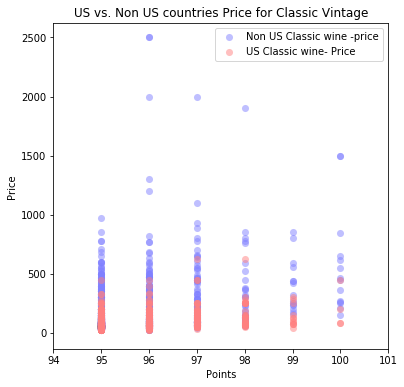

In [92]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,6))
alpha = 0.5
plt.scatter(vintageNonUS['points'], vintageNonUS['price'], color=[ alpha, alpha, 1,0.5], s=50, lw=0)
plt.scatter(vintageUS['points'], vintageUS['price'], color=[1, alpha, alpha,0.5], s=50, lw=0)



plt.xlim(right =101, left = 94)
plt.title("US vs. Non US countries Price for Classic Vintage")
plt.ylabel("Price")
plt.xlabel("Points")
plt.legend(['Non US Classic wine -price','US Classic wine- Price' ])

plt.show()
fig.savefig('USandNonUSClassicWinePrice.png')